105.88645802453468


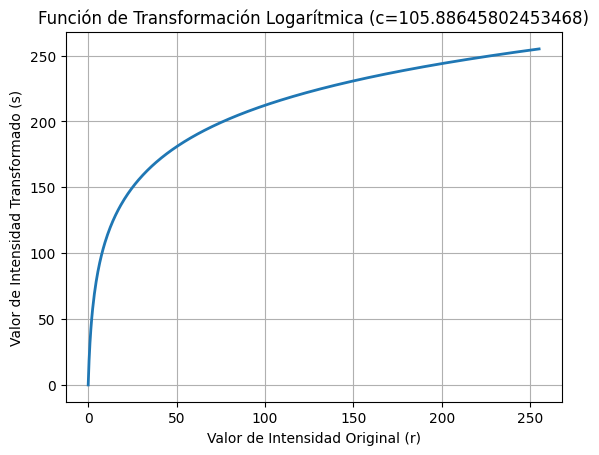

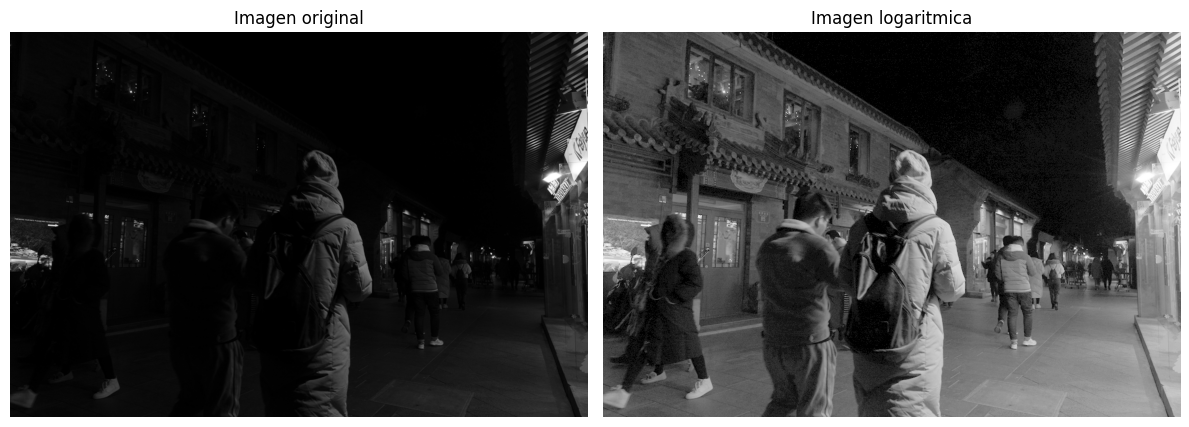

In [22]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Leer la imagen y convertirla a escala de grises
I_gray = cv2.imread('Imagen1_original.png', cv2.IMREAD_GRAYSCALE)

# Convertir a tipo float para aplicar la transformación
# Añadir 1 para evitar log(0)
I_normalizada = I_gray.astype(np.float64) + 1

# Parámetro de la transformación logarítmica
# Factor de escala
c = 1
c = 255 / np.log10(1 + 255)
print(c)
nbins = 512

# Función de transformación logarítmica
r = np.linspace(0, np.max(I_gray), nbins)   # Crear un rango de intensidades
s = c * np.log10(1 + r)                  # Aplicar la transformación logarítmica

# Graficar la función de transformación logarítmica
plt.figure()
plt.plot(r, s, linewidth=2)
plt.xlabel('Valor de Intensidad Original (r)')
plt.ylabel('Valor de Intensidad Transformado (s)')
plt.title(f'Función de Transformación Logarítmica (c={c})')
plt.grid(True)
plt.show()

# Aplicar la transformación logarítmica a la imagen
imagen_logaritmica = c * np.log10(1 + I_normalizada)
# Convertir la imagen de vuelta a formato uint8
imagen_logaritmica = np.uint8(np.clip(imagen_logaritmica, 0, 255))

#mostrar.mostrarNormalizado(I_gray,I_log_norm)


# Mostrar la imagen original y la ecualizada
plt.figure(figsize=(12, 6))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(I_gray, cv2.COLOR_BGR2RGB))
plt.title("Imagen original")
plt.axis("off")

# Imagen ecualizada
plt.subplot(1, 2, 2)
plt.imshow(imagen_logaritmica, cmap="gray")
plt.title("Imagen logaritmica")
cv2.imwrite("Imagen1_logaritmica.png", imagen_logaritmica)
plt.axis("off")

plt.tight_layout()
plt.show()

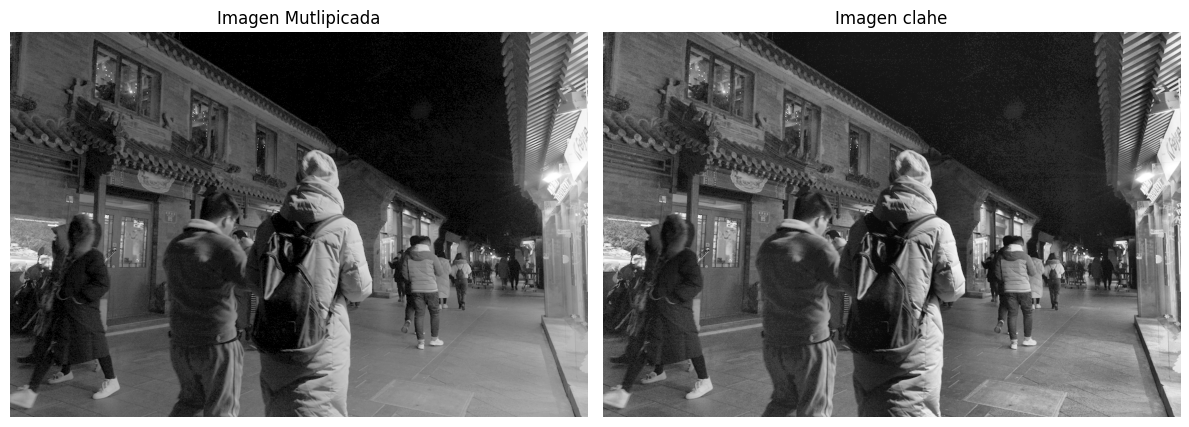

In [23]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Leer la imagen y convertirla a escala de grises
I_gray_log = cv2.imread('Imagen1_logaritmica.png', cv2.IMREAD_GRAYSCALE)

# Verificar si la imagen se cargó correctamente
if I_gray_log is None:
    print("Error: No se pudo cargar la imagen 'Imagen2_logaritmica.png'. Por favor, verifica la ruta y el nombre del archivo.")
else:
    # 2. Crear un objeto CLAHE y aplicar
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    img_clahe = clahe.apply(I_gray_log)

    # Mostrar la imagen original y la ecualizada
    plt.figure(figsize=(12, 6))

    # Imagen original
    plt.subplot(1, 2, 1)
    plt.imshow(I_gray_log,cmap="gray")
    plt.title("Imagen Mutlipicada")
    plt.axis("off")

    # Imagen ecualizada
    plt.subplot(1, 2, 2)
    plt.imshow(img_clahe, cmap="gray") # Added cmap="gray" for consistent display
    plt.title("Imagen clahe")
    cv2.imwrite("Imagen1_logaritmica_clahe.png", img_clahe)
    plt.axis("off")

    plt.tight_layout()
    plt.show()

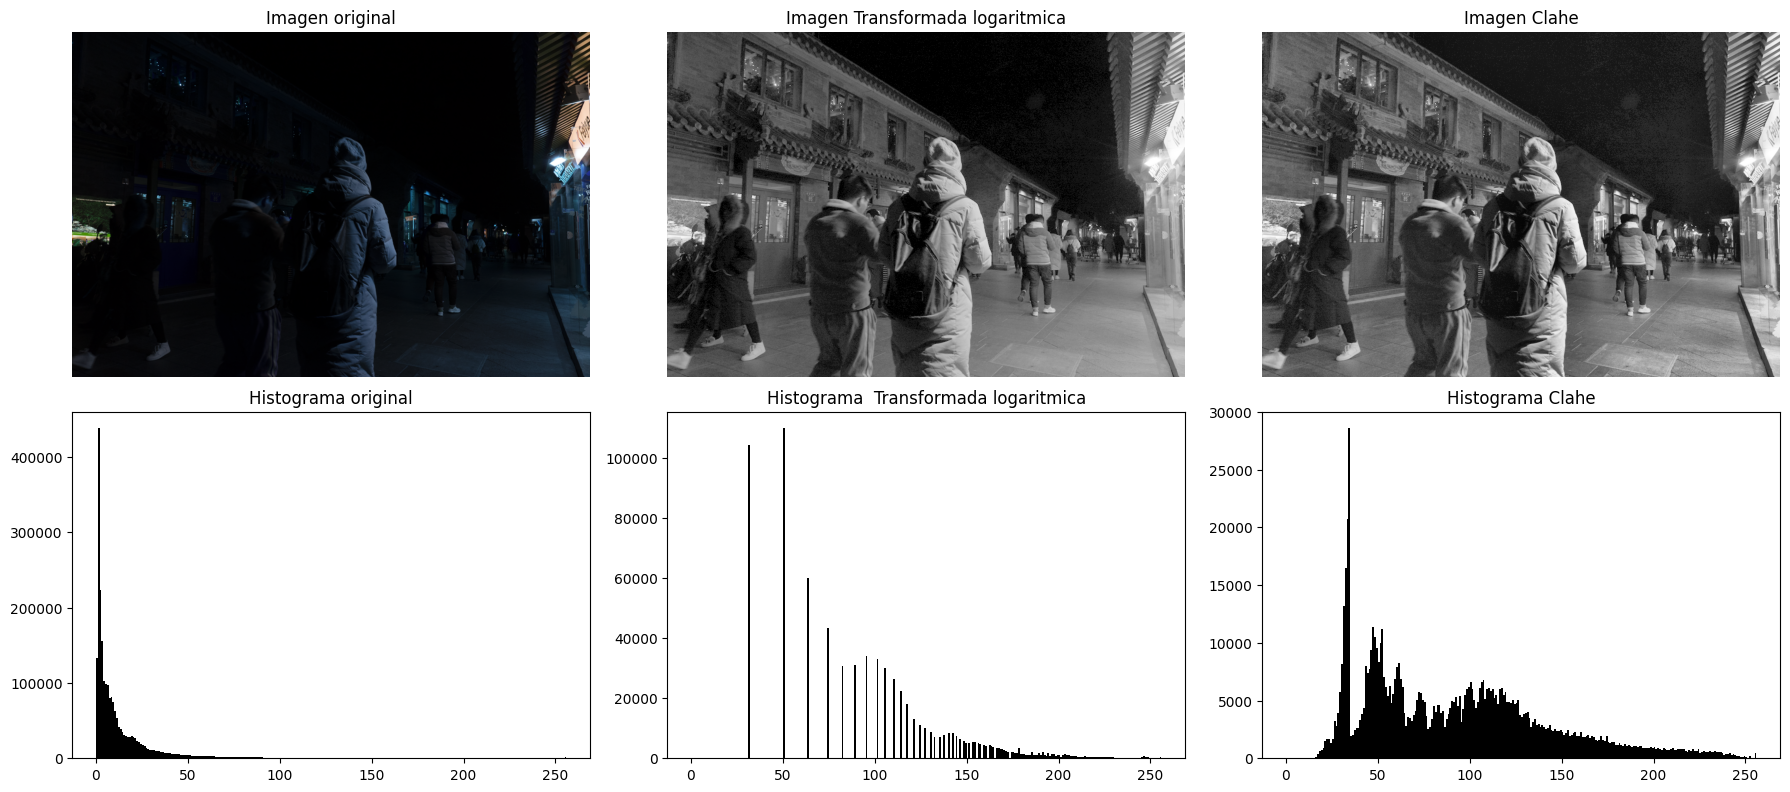

In [30]:
# Cargar imagen
image_original = cv2.imread("Imagen1_original.png", cv2.COLOR_BGR2RGB)
image_log = cv2.imread("Imagen1_logaritmica.png", cv2.COLOR_BGR2RGB)
image_clahe = cv2.imread("Imagen1_logaritmica_clahe.png",cv2.COLOR_BGR2RGB)
plt.figure(figsize=(18, 8))
# Imagen original
plt.subplot(2, 3, 1)
plt.imshow(image_original)
plt.title("Imagen original")
plt.axis("off")
plt.subplot(2, 3, 4)
plt.title("Histograma original")
plt.hist(image_original.ravel(), bins=256, range=(0, 256), color='black')
# Imagen multi
plt.subplot(2, 3, 2)
plt.imshow(image_log, cmap="gray")
plt.title("Imagen Transformada logaritmica")
plt.axis("off")
plt.subplot(2, 3, 5)
plt.title("Histograma  Transformada logaritmica")
plt.hist(image_log.ravel(), bins=256, range=(0, 256), color='black')
# Imagen ecualizada
plt.subplot(2, 3, 3)
plt.imshow(image_clahe, cmap="gray")
plt.title("Imagen Clahe")
plt.axis("off")
plt.subplot(2, 3, 6)
plt.title("Histograma Clahe")
plt.hist(image_clahe.ravel(), bins=256, range=(0, 256), color='black')
# Imagen ecualizada
plt.tight_layout()
plt.show()


#1
plt.figure()
plt.imshow(image_original)
plt.title("Imagen original")
plt.axis("off")
plt.savefig("resultado1_original.png")
plt.close()

#2
plt.figure()
plt.imshow(image_log)
plt.title("Imagen Transformada logaritmica")
plt.axis("off")
plt.savefig("imagen1_logaritmica.png")
plt.close()

#3
plt.figure()
plt.imshow(image_clahe)
plt.title("Imagen CLAHE")
plt.axis("off")
plt.savefig("resultado1_clahe.png")
plt.close()

#4
plt.figure()
plt.hist(image_original.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histograma original")
plt.xlabel("Intensidad")
plt.ylabel("Pixeles")
plt.savefig("histograma1_original.png")
plt.close()

#5
plt.figure()
plt.hist(image_log.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histograma  Transformada logaritmica")
plt.xlabel("Intensidad")
plt.ylabel("Pixeles")
plt.savefig("histograma1_logaritmica.png")
plt.close()

#6
plt.figure()
plt.hist(image_clahe.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histograma CLAHE")
plt.xlabel("Intensidad")
plt.ylabel("Pixeles")
plt.savefig("histograma1_CLAHE.png")
plt.close()

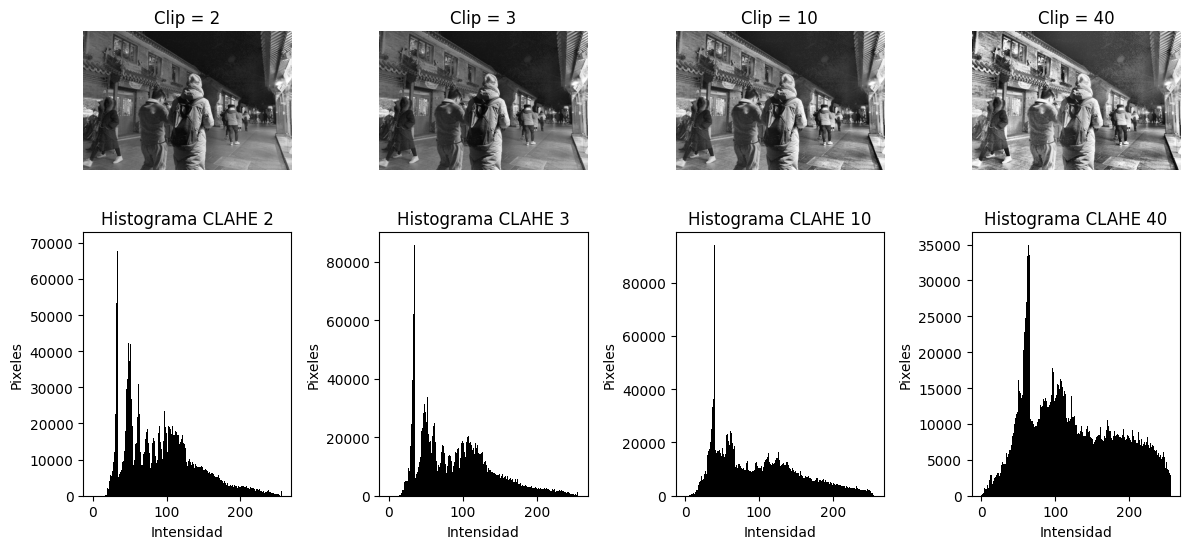

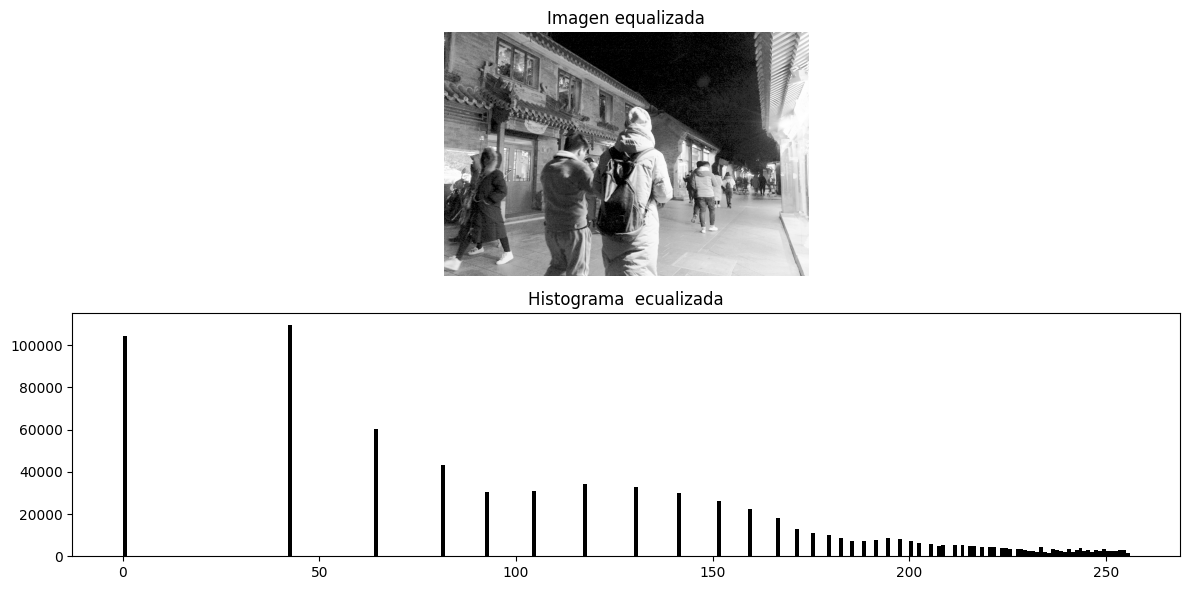

In [49]:

import matplotlib.pyplot as plt
import cv2
import numpy as np
clipLimits = [2,3,10,40]
# Mostrar la imagen original y la ecualizada
plt.figure(figsize=(12, 6))

image_original = cv2.imread("Imagen1_original.png", cv2.COLOR_BGR2RGB)
image_log = cv2.imread("Imagen1_logaritmica.png", cv2.COLOR_BGR2RGB)


# Leer la imagen y convertirla a escala de grises
I_gray_log = cv2.imread('imagen1_logaritmica.png', cv2.IMREAD_GRAYSCALE)
img_clahes= []
# Verificar si la imagen se cargó correctamente
if I_gray_log is None:
    print("Error: No se pudo cargar la imagen 'Imagen2_logaritmica.png'. Por favor, verifica la ruta y el nombre del archivo.")
else:
  for i, clip in enumerate(clipLimits, start=1):
      clahe = cv2.createCLAHE(clipLimit=clip, tileGridSize=(8, 8))
      img_clahe = clahe.apply(image_log)

      # Mostrar la imagen transformada
      plt.subplot(2, 4, i)
      plt.title(f"Clip = {clip}")
      plt.imshow(img_clahe, cmap='gray')
      plt.axis("off")
      img_clahes.append(img_clahe)
      filename = f"imagen1_clahe_{clip}.png"
      cv2.imwrite(filename, img_clahe)
      plt.subplot(2, 4, i+4)
      img_clahe_rgb = cv2.cvtColor(img_clahe, cv2.COLOR_GRAY2RGB)

      plt.hist(img_clahe_rgb.ravel(), bins=256, range=(0, 256), color='black')
      titlehist = f"Histograma CLAHE {clip}"
      filenamehist = f"Histograma_imagen1_CLAHE_{clip}.png"
      plt.title(titlehist)
      plt.xlabel("Intensidad")
      plt.ylabel("Pixeles")
      plt.savefig(filenamehist)
img_eq =cv2.equalizeHist(image_log)

# Ajustar diseño y mostrar la cuadrícula
plt.tight_layout()
plt.show()
# Mostrar la imagen original y la ecualizada
plt.figure(figsize=(12, 6))
# Imagen multi
plt.subplot(2,1, 1)
plt.imshow(img_eq, cmap="gray")
cv2.imwrite("Imagen1_equalizada.png", img_eq)
plt.title("Imagen equalizada")
plt.axis("off")
plt.subplot(2, 1, 2)
plt.title("Histograma  ecualizada")
plt.hist(img_eq.ravel(), bins=256, range=(0, 256), color='black')
# Ajustar diseño y mostrar la cuadrícula
plt.tight_layout()
plt.show()

